<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.reporteindigo.com/wp-content/uploads/2018/02/trafico.jpg" width="300px" height="100px" />


# Proyecto Módulo 2.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

# <span style = "color:blue">  1. Probabilidad de tener un percance vial en la CDMX. </span>
> Se utilizaran los conocimientos adquiridos en clase para modelar las probabilidades que hay de que tengas un percance vial en la CDMX dependiendo de ciertas variables aleatorias que serán definidas en las siguientes secciones.

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Modelar con las probabilidades y funciones de distribución obtenidas, las probabilidades de tener un percance vial.
> #### 1.2 Objetivos específicos
>  - Obtener una base de datos precisa y confiable sobre los percances viales.
>  - Definir el proceso de una manera detallada.
>  - Plantear los procesos aleatorios que hay dentro del proceso.
>  - Limpiar y acotar base de datos de acuerdo a los planteamientos.
>  - Obtener probabilidades de cada uno de los procesos aleatorios.
>  - Comparar los datos con funciones de distribución ya existentes para encontrar las funciones adecuadas.
>  - Utilizar las funciones de distribución para la modelación.


### 1.3 Definición del problema.

Un carro te da libertad, puedes moverte de un lugar a otro sin ‘esfuerzo’, es por eso que es la elección preferida de muchos para transportarse alrededor de la ciudad.  Según datos del Instituto Nacional de Estadística y Geografía en la Ciudad de México existen 4.7 millones de vehículos automotores registrados, esta enorme cantidad de autos trae consigo varios problemas debido a embotellamientos, choques, atropellamientos y otros más. Los últimos nos pueden afectar física y económicamente es por esto que debemos de darles importancia.

El carro lo puedes utilizar para transportarte a distintos lugares, mejor dicho a cualquier lugar pero esto no es el propósito de este proyecto, el propósito de este proyecto es analizar lo que pasa durante el trayecto de un punto a otro, porque aunque muchos no lo crean hay demasiados riesgos durante el transcurso, tan solo el año pasado se reportaron 229,467 incidentes viales. Entre estos hubo todo tipo de accidentes y lo que buscamos es encontrar los puntos, las horas y los días donde es más probable que ocurran este tipo de incidentes.

Es necesario crear un modelo para hacer las estimaciones de probabilidad cambiando las variables, las variables que se escogerían dentro de nuestro modelo de manera aleatoria son:
-	Día de la semana.
-	Fecha de viaje.
-	Ubicación del incidente. 
    
El modelo estará basado en el cálculo de la probabilidad condicional donde el choque ocurra dado el día de la semana, fecha del viaje y ubicación del incidente. Es decir estos son los escenarios que vamos a simular en el proyecto.

    
¿Por qué esos escenarios? Porque lo que estamos buscando es no solo ver donde son las zonas más riesgosas para manejar dentro de la ciudad de México, también queremos encontrar los horarios y los días de semana donde esas zonas se complican aún más. De esta manera podríamos generar un mapa de la ciudad mostrando las zonas por grado de riesgo en los distintos horarios y días. 

### 1.4 Nodos y variables que se decidieron simular y porqué
**La probabilidad condicional dada las 3 variables sería el resultado final de nuestro modelo.**

<img src="Flowchart.png">

Como se puede ver en el gráfico de arriba, nosotros vamos a estar simulando las variables que se encuentran en los círculos individualmente, una vez que simulemos las 3 variables, estas se convierten en condiciones para el modelo de la probabilidad condicional, lo que resulta en un nodo que se divide en 2. El nodo tiene como resultado el haber tenido un percance vial durante el trayecto o el haber llegado al destino correctamente.



### 1.6 Obtención de bases de datos


La base de datos que se estará utilizando durante el proyecto se encuentran en el sitio web https://datos.cdmx.gob.mx/explore/dataset/incidentes-viales-c5/export/?disjunctive.incidente_c4, esta base de datos es administrada por el gobierno de la Ciudad de México por lo cual es altamente confiable. La estructura de los datos es la siguiente:

In [3]:
import pandas as pd
import numpy as np

datos_lunes = pd.read_excel("incidentes-viales-lunes.xls")
datos_lunes.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia,fecha
0,C5/191014/07805,14/10/2019,22:25:02,Lunes,(N) La unidad de atención a emergencias fue de...,15/10/2019,2019,Octubre,04:27:28,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43017,-99.09081,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.43017002, -99.09081",10,14,2019-10-14
1,C5/191014/07745,14/10/2019,22:16:37,Lunes,(N) La unidad de atención a emergencias fue de...,16/10/2019,2019,Octubre,08:19:31,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45751,-99.19242,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,"19.45751004, -99.19242",10,14,2019-10-14
2,C5/191021/01780,21/10/2019,08:17:27,Lunes,(D) El incidente reportado se registró en dos ...,21/10/2019,2019,Octubre,08:52:36,GUSTAVO A. MADERO,lesionado-atropellado,19.52979,-99.16993,URGENCIAS MEDICAS,RADIO,GUSTAVO A. MADERO,"19.52979003, -99.16993008",10,21,2019-10-21
3,C5/191021/05689,21/10/2019,17:19:06,Lunes,(N) La unidad de atención a emergencias fue de...,21/10/2019,2019,Octubre,17:43:27,AZCAPOTZALCO,accidente-choque sin lesionados,19.49957,-99.19807,EMERGENCIA,LLAMADA DEL 911,AZCAPOTZALCO,"19.49957001, -99.19806984",10,21,2019-10-21
4,C5/191021/02649,21/10/2019,10:40:46,Lunes,(N) La unidad de atención a emergencias fue de...,21/10/2019,2019,Octubre,10:47:44,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.41197,-99.08913,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.41197004, -99.08912988",10,21,2019-10-21


Es una base muy completa y cada índice tiene los datos que nosotros requerimos para nuestro proyecto. Por razones de memoria y procesamiento se utilizaran solo los incidentes viales registrados en el año 2019, aun así dentro de la base se encuentran 229,467 casos.

# Desarrollo

In [2]:
#Importación de librerías
from JSAnimation.IPython_display import anim_to_html
from numpy import array, linspace, zeros, ones, ones_like
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, hist, plot, ion, axes, title
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation as animation
import pandas as pd 
from datetime import datetime
import datetime as dt
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats.distributions import norm
import scipy.stats as st 
%pylab inline
%matplotlib inline




Populating the interactive namespace from numpy and matplotlib


/Users/Jorge/enter/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Importación de datos
datos_lunes = pd.read_excel("incidentes-viales-lunes.xls")
datos_martes = pd.read_excel("incidentes-viales-martes.xls")
datos_miercoles = pd.read_excel("incidentes-viales-miercoles.xls")
datos_jueves = pd.read_excel("incidentes-viales-jueves.xls")
datos_viernes = pd.read_excel("incidentes-viales-viernes.xls")
datos_sabado = pd.read_excel("incidentes-viales-sabado.xls")
datos_domingo = pd.read_excel("incidentes-viales-domingo.xls")

## Procedimiento

### Importación de  funciones de kernel density y método de aceptación y rechazo

In [4]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw = 'cv_ml',#bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    condition = R2*t <= f
    [plt.plot(R1[i],R2[i]*t[i],'ob',markersize=1) if condition[i] else plt.plot(R1[i],R2[i]*t[i],'o',markersize=1) for i in range(len(R1))] 
    numeros_distribuidos = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.show()
    return numeros_distribuidos

Package Versions:
  scikit-learn: 0.21.3
  scipy: 1.3.1
  statsmodels: 0.10.1


## Simulación de primer variable

### Percances viales en día de la semana

### Creación de función

In [9]:
def funcion_densidad(datos):
    # Modificar los datos
    datos = datos.set_index(pd.DatetimeIndex(datos['fecha']))
    datos["Conteo"] = 1
    S_datos = pd.DataFrame(datos["Conteo"].resample('1D').sum())
    S_datos = S_datos[S_datos["Conteo"] > 50]
    S_valores = S_datos.values
    S_valores = np.reshape(S_valores, (52,))
    S_valores = S_valores.astype('double')
    minimo = np.min(S_valores) - 50
    maximo = np.max(S_valores) + 50 
    # Generar los density kernel estimates
    x = S_valores
    fig, ax = plt.subplots(1, 4, sharey=True,
                           figsize=(13, 3))
    fig.subplots_adjust(wspace=0)

    for i in range(4):
        pdf = kde_funcs[i](x, x_grid, bandwidth=50)
        ax[i].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
        ax[i].fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
        ax[i].set_title(kde_funcnames[i])
        ax[i].set_xlim(minimo, maximo)

    from IPython.display import HTML
    HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
         "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")
    
    # Graficar histogramas con diferentes band widths
    fig, ax = plt.subplots()
    for bandwidth in [10, 25, 50]:
        ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
                label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
    ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
    ax.set_xlim(minimo, maximo)
    ax.legend(loc='upper left')
    
    # Encontrar el band width correcto
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(KernelDensity(),
                        {'bandwidth': np.linspace(10, 100, 30)},
                        cv=20) # 20-fold cross-validation
    grid.fit(x[:, None])
    print(grid.best_params_)
    
    kde = grid.best_estimator_
    pdf = np.exp(kde.score_samples(x_grid[:, None]))

    fig, ax = plt.subplots()
    ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
    ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
    ax.legend(loc='upper left')
    ax.set_xlim(minimo, maximo);
    pdf_stats = kde_statsmodels_m(x, x_grid, bandwidth=kde.bandwidth)
    
    # Método de aceptación y rechazo 
    # Máximo de la función f
    f = pdf_stats
    max_f = np.max(f)
    # Función t -> Función constante
    t = max_f*np.ones(len(x_grid)) # función constante
    # Gráficas de las funciones
    plt.plot(x_grid,pdf_stats,label='f(x)')
    plt.plot(x_grid,t,label='t(x)')
    plt.legend()
    # Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
    R2 = np.random.rand(10000)
    R1 = x_grid
    num = Acep_rechazo(R2,R1,f,t)

In [10]:
#Parametros de la función
from scipy.stats.distributions import norm
x_grid = np.linspace(300, 750, 10000)
np.random.seed(0)
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))
# Parametros de la función aceptación y rechazo
R2 = np.random.rand(10000)
R1 = x_grid

/Users/Jorge/enter/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bandwidth': 25.517241379310345}


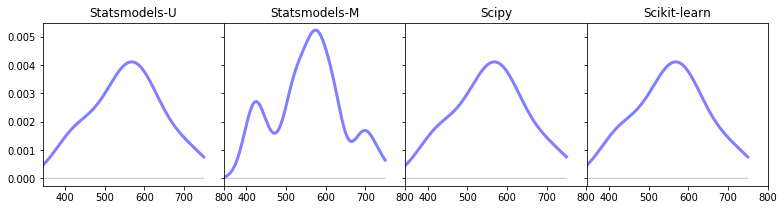

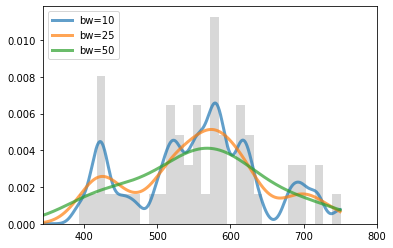

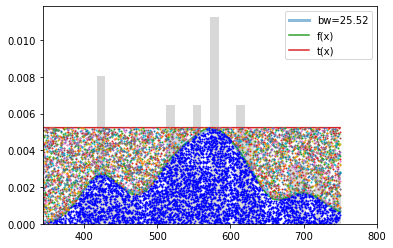

In [11]:
funcion_densidad(datos_lunes)

## Simulación de segunda variable 

### Primera opción: Obtener una distribucion binomial con la media de los datos 

In [5]:
def binomial(datos: "Día de simulación",
            hora: "Hora de simulación en modo 24-h"):
    datos.loc[:,'Date'] = pd.to_datetime(datos.fecha.astype(str)+' '+datos.hora_creacion.astype(str))
    datos = datos.set_index(pd.DatetimeIndex(datos['Date']))
    datos["Conteo"] = 1
    datos_horas = pd.DataFrame(datos["Conteo"].resample('H').sum()) # Se divide por día y hora
    series = pd.Series(datos_horas['Conteo'].values, index=datos_horas.index) # Se convierte a series
    horas = series.groupby(series.index.hour).agg(list) # Se agrupa por hora 
    t = horas[hora]
    T = pd.DataFrame(t)
    T.columns = ["Count"]
    T = T[T["Count"] > 0] # Eliminar los valores iguales a cero 
    
    Lamda = [T["Count"].mean()] 
    k=np.arange(0,40); 

    # Distribución de probabilidad
    P = np.array([st.poisson(Lamda[i]).pmf(k) for i in range(len(Lamda))])

    # Distribución de probabilidad acumulada
    P_acum = np.array([st.poisson(Lamda[i]).cdf(k) for i in range(len(Lamda))])

    fig,[ax1,ax2] = plt.subplots(1,2,sharey=False,figsize=[12,4])
    ax1.plot(P.T,'o',markersize=3)
    ax1.legend(['$\lambda$=%d'%i for i in Lamda])
    ax1.hist(T.values,bins = 10,density = True)
    ax1.title.set_text('Distribución de probabilidad')

    ax2.plot(P_acum.T,'o',markersize=3)
    #ax1.hist(a,bins = 5,density = True)
    [ax2.hlines(P_acum[i,:],range(len(k)),range(1,len(k)+1)) for i in range(len(Lamda))]
    plt.legend(['$\lambda$=%d'%i for i in Lamda])
    ax2.title.set_text('Distribución de probabilidad')

    plt.show()
    # P_acum.shape
    return Lamda

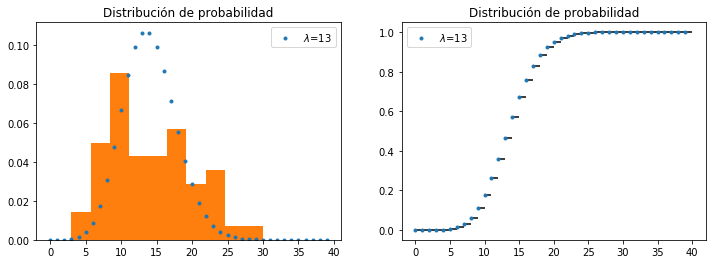

[13.98076923076923]

In [6]:
binomial(datos_lunes,0)

### Segunda opción: Kernel-density 

In [7]:
def funcion_densidad_horas(datos: "Día de simulación",
                     hora: "Hora de simulación en modo 24-h"):
    # Modificar los datos
    datos.loc[:,'Date'] = pd.to_datetime(datos.fecha.astype(str)+' '+datos.hora_creacion.astype(str))
    datos = datos.set_index(pd.DatetimeIndex(datos['Date']))
    datos["Conteo"] = 1
    datos_horas = pd.DataFrame(datos["Conteo"].resample('H').sum()) # Se divide por día y hora
    series = pd.Series(datos_horas['Conteo'].values, index=datos_horas.index) # Se convierte a series
    horas = series.groupby(series.index.hour).agg(list) # Se agrupa por hora 
    t = horas[hora]
    T = pd.DataFrame(t)
    T.columns = ["Count"]
    T = T[T["Count"] > 0]
    S_valores = T.values
    S_valores = np.reshape(S_valores, (52,))
    S_valores = S_valores.astype('double')
    minimo = np.min(S_valores) - 5 
    maximo = np.max(S_valores) + 5 
    
    # Generar los density kernel estimates
    x = S_valores
    
    # Graficar histogramas con diferentes band widths
    fig, ax = plt.subplots()
    for bandwidth in [5, 10, 15]:
        ax.plot(x_grid_h, kde_sklearn(x, x_grid_h, bandwidth=bandwidth),
                label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
    ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
    ax.set_xlim(minimo, maximo)
    ax.legend(loc='upper left')
    
    # Encontrar el band width correcto
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(KernelDensity(),
                        {'bandwidth': np.linspace(10, 100, 30)},
                        cv=20) # 20-fold cross-validation
    grid.fit(x[:, None])
    print(grid.best_params_)
    
    kde = grid.best_estimator_
    pdf = np.exp(kde.score_samples(x_grid_h[:, None]))

    fig, ax = plt.subplots()
    ax.plot(x_grid_h, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
    ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
    ax.legend(loc='upper left')
    ax.set_xlim(minimo, maximo);
    pdf_stats = kde_statsmodels_m(x, x_grid_h, bandwidth=kde.bandwidth)
    
    # Método de aceptación y rechazo 
    # Máximo de la función f
    f = pdf_stats
    max_f = np.max(f)
    # Función t -> Función constante
    t = max_f*np.ones(len(x_grid_h)) # función constante
    # Gráficas de las funciones
    plt.plot(x_grid_h,pdf_stats,label='f(x)')
    plt.plot(x_grid_h,t,label='t(x)')
    plt.legend()
    # Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
    R2 = np.random.rand(1000)
    R1 = x_grid_h
    num = Acep_rechazo(R2,R1,f,t)

In [8]:
#Parametros de la función
from scipy.stats.distributions import norm
x_grid_h = np.linspace(0, 30, 1000)
np.random.seed(0)
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid_h) +
            0.2 * norm(1, 0.3).pdf(x_grid_h))

/Users/Jorge/enter/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bandwidth': 10.0}


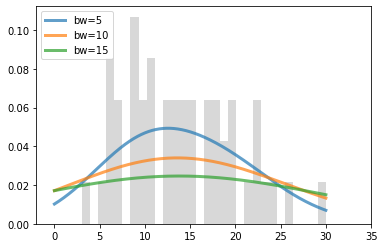

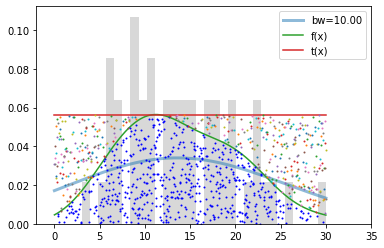

In [9]:
funcion_densidad_horas(datos_lunes,0)